# Short-term plasticity
In this case, the connection between neurons has to scale the synaptic weight, based on the spike history and the parameters of the kinetic model.
Short-term plasticity can ben:

- Short-term depletion: motivated by the depletion of vesicles in the available pool of synaptic vescicles;
- Short-term facilitation: motivated by a presynaptic increase of release probability.

**It's a presynaptic mechanism**

**Tsodyks-Markram model**

The **Tsodyks-Markram model** (or **STP**, **short-term plasticity**) is a synaptic model proposed by Tsodyks and Markram in 1997. It describes the dynamics of synaptic plasticity over short timescales, particularly how synaptic strength varies in response to the frequency of action potentials.

The model includes three main variables that represent the state of the synapse:

1. **\( x \)**: the fraction of synaptic vesicles recovered.
2. **\( y \)**: the fraction of synaptic vesicles in the active state.
3. **\( z \)**: the fraction of synaptic vesicles in the inactive state.

Take into account that: x + y + z = 1.
Then a fourth state variable describes the use of these synaptic resources in response to a presynaptic action potential (arriving at time $t_0$).

Look at the original reference: https://infoscience.epfl.ch/entities/publication/5d0a3117-2c0b-4bf0-baa4-d8aab14a6d3b.

Look at the NEST model: https://nest-simulator.readthedocs.io/en/stable/models/tsodyks_synapse.html


In [44]:
import nest
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [25]:
nest.ResetKernel()

In [26]:
nest.GetDefaults('tsodyks_synapse')

{'delay': 1.0,
 'U': 0.5,
 'element_type': 'synapse',
 'has_delay': True,
 'num_connections': 0,
 'receptor_type': 0,
 'requires_symmetric': False,
 'sizeof': 96,
 'synapse_model': 'tsodyks_synapse',
 'synapse_modelid': 65,
 'tau_fac': 0.0,
 'tau_psc': 3.0,
 'tau_rec': 800.0,
 'u': 0.0,
 'weight': 1.0,
 'weight_recorder': NodeCollection(<empty>),
 'x': 1.0,
 'y': 0.0}

In [27]:
# set of parameters for depletion:
depletion_params = {"U": 0.67, "u": 0.67, "x": 1.0, "tau_rec": 450.0, "tau_fac": 0.0, "weight": 250.0}
tsodyks_params_dep = dict(depletion_params, synapse_model="tsodyks_synapse")

In [51]:
# set of parameters for facilitation:
facilitation_params = {"U": 0.1, "u": 0.1, "x": 1.0, "tau_fac": 1000.0, "tau_rec": 100.0, "weight": 250.0}
tsodyks_params_fac = dict(facilitation_params, synapse_model="tsodyks_synapse")

In [29]:
# create 2 neurons
neuron = nest.Create("iaf_psc_exp", 2, params={"tau_syn_ex": 3.0})

In [30]:
# connect by tsodyks synapse
nest.Connect(neuron[0], neuron[1], syn_spec=tsodyks_params_fac)

In [31]:
# create and connect recorder for the neurons
voltmeter = nest.Create("voltmeter", 2)
nest.Connect(voltmeter[0], neuron[0])
nest.Connect(voltmeter[1], neuron[1])

In [32]:
neuron[0].I_e = 376.0
nest.Simulate(500.0)
neuron[0].I_e = 0.0
nest.Simulate(500.0) # 1500
neuron[0].I_e = 376.0
nest.Simulate(500.0)


Nov 11 22:37:49 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Nov 11 22:37:49 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 500
    Number of OpenMP threads: 1
    Not using MPI

Nov 11 22:37:49 SimulationManager::run [Info]: 
    Simulation finished.

Nov 11 22:37:49 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Nov 11 22:37:49 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 500
    Number of OpenMP threads: 1
    Not using MPI

Nov 11 22:37:49 SimulationManager::run [Info]: 
    Simulation finished.

Nov 11 22:37:49 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Nov 11 22:37:49 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 500
    Number of OpenMP threads: 1
    Not using MPI

Nov 11 22:37:49 SimulationManager::run [Info]: 
    Simulation finis

Simulate the standard STP protocol: a burst of spikes, followed by a pause and a recovery response

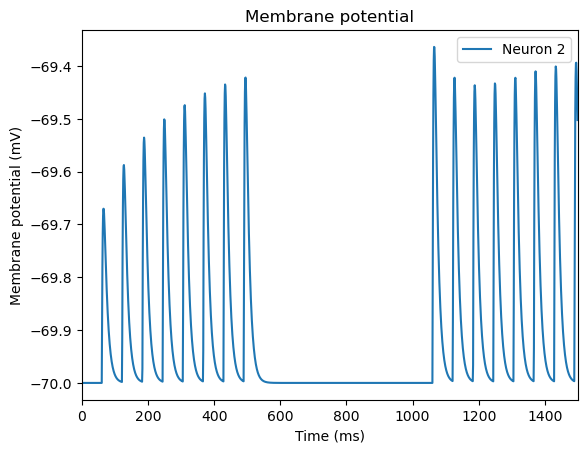

In [33]:
#nest.voltage_trace.from_device(voltmeter[0])
nest.voltage_trace.from_device(voltmeter[1])
plt.xlim(0,1500)
plt.show()

**What is happening?**

1. Initial Burst:

    During the initial burst of action potentials, the **synaptic efficacy
    𝑢 and the release probability increase** due to the accumulation of calcium ions in the presynaptic terminal. This results in progressively larger excitatory postsynaptic potentials (EPSPs).

2. Pause (Rest Period):

    During the pause, synaptic resources begin to recover, as represented by the 𝑥 (recovered) and 𝑧 (inactivated) variables in the Tsodyks-Markram model. **𝑢 also decays back toward its baseline** value as facilitation diminishes over time.
    Depending on the duration of the pause, the synapse may partially or fully recover. Longer pauses allow more complete recovery of synaptic resources and a reduction in facilitation effects.

3. Re-stimulation (Second Burst):

    When stimulation resumes, the initial responses of the synapse may be enhanced compared to the very first burst if some facilitation effects are still present. However, if the pause is long enough, the facilitation may have dissipated, and the responses might resemble those seen in the initial burst.
    If the re-stimulation occurs after a short pause, the synaptic response could show a stronger facilitation effect due to residual resources 𝑥.

**Exercise: try to change the protocol: what if the pause is longer?**

In [34]:
nest.ResetKernel()

In [35]:
# repeat for depletion
neuron = nest.Create("iaf_psc_exp", 2, params={"tau_syn_ex": 3.0})
nest.Connect(neuron[0], neuron[1], syn_spec=tsodyks_params_dep)
voltmeter = nest.Create("voltmeter", 2)
nest.Connect(voltmeter[0], neuron[0])
nest.Connect(voltmeter[1], neuron[1])
neuron[0].I_e = 376.0
nest.Simulate(500.0)
neuron[0].I_e = 0.0
nest.Simulate(500.0)
neuron[0].I_e = 376.0
nest.Simulate(500.0)


Nov 11 22:38:46 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Nov 11 22:38:46 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 500
    Number of OpenMP threads: 1
    Not using MPI

Nov 11 22:38:46 SimulationManager::run [Info]: 
    Simulation finished.

Nov 11 22:38:46 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Nov 11 22:38:46 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 500
    Number of OpenMP threads: 1
    Not using MPI

Nov 11 22:38:46 SimulationManager::run [Info]: 
    Simulation finished.

Nov 11 22:38:46 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Nov 11 22:38:46 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 500
    Number of OpenMP threads: 1
    Not using MPI

Nov 11 22:38:46 SimulationManager::run [Info]: 
    Simulation finis

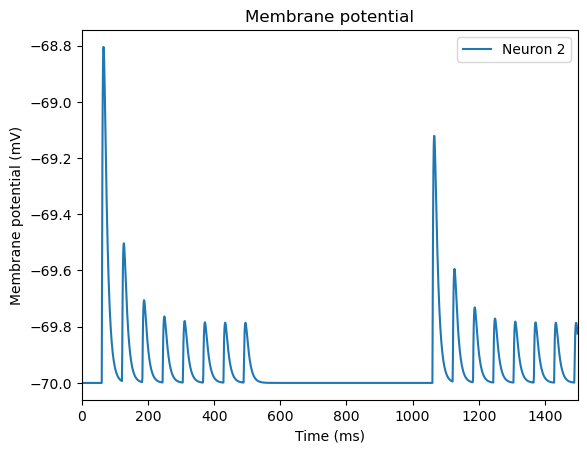

In [36]:
nest.voltage_trace.from_device(voltmeter[1])
plt.xlim(0,1500)
plt.show()

In [42]:
nest.ResetKernel()


Nov 11 23:32:16 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Nov 11 23:32:16 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 2000
    Number of OpenMP threads: 1
    Not using MPI

Nov 11 23:32:16 SimulationManager::run [Info]: 
    Simulation finished.


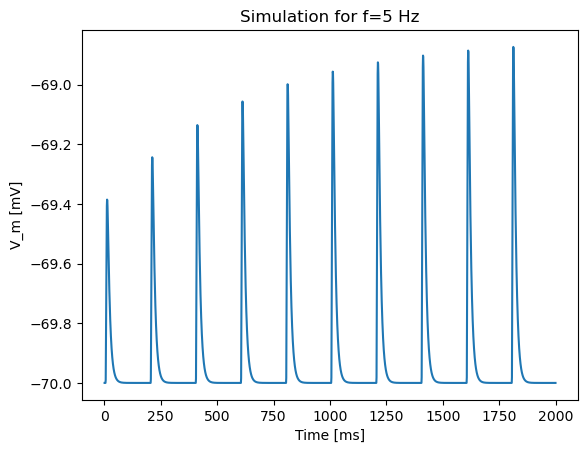


Nov 11 23:32:16 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Nov 11 23:32:16 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 2000
    Number of OpenMP threads: 1
    Not using MPI

Nov 11 23:32:16 SimulationManager::run [Info]: 
    Simulation finished.


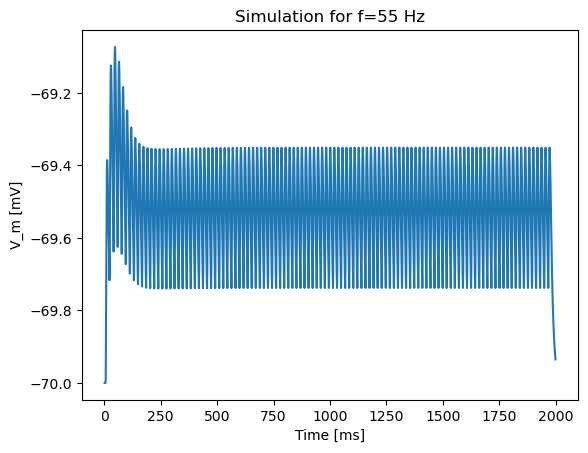


Nov 11 23:32:16 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Nov 11 23:32:16 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 2000
    Number of OpenMP threads: 1
    Not using MPI

Nov 11 23:32:16 SimulationManager::run [Info]: 
    Simulation finished.


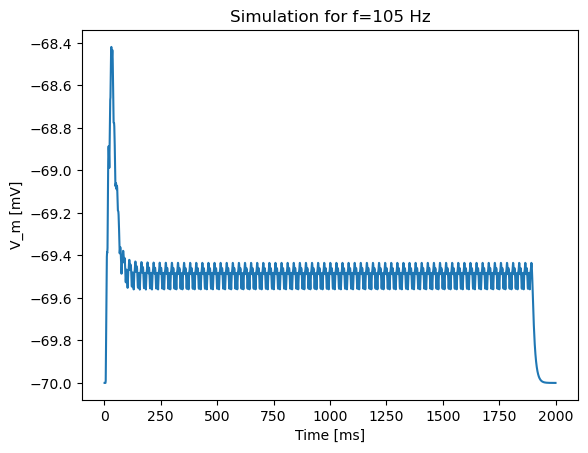


Nov 11 23:32:16 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Nov 11 23:32:16 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 2000
    Number of OpenMP threads: 1
    Not using MPI

Nov 11 23:32:16 SimulationManager::run [Info]: 
    Simulation finished.


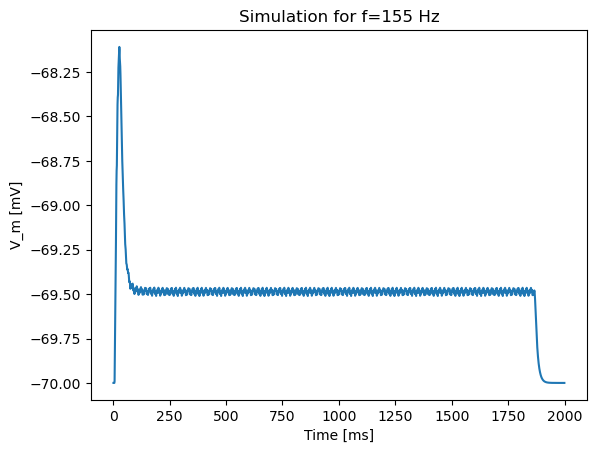


Nov 11 23:32:16 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Nov 11 23:32:16 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 2000
    Number of OpenMP threads: 1
    Not using MPI

Nov 11 23:32:16 SimulationManager::run [Info]: 
    Simulation finished.


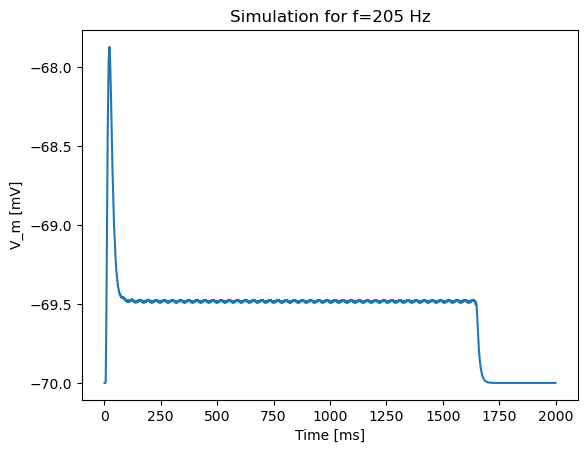


Nov 11 23:32:16 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Nov 11 23:32:16 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 2000
    Number of OpenMP threads: 1
    Not using MPI

Nov 11 23:32:16 SimulationManager::run [Info]: 
    Simulation finished.


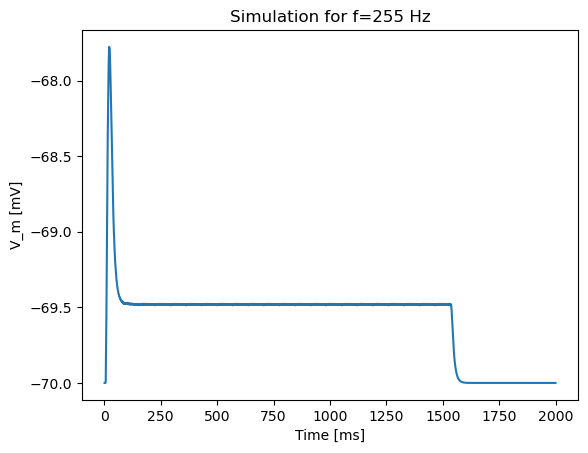

In [72]:
freqs = np.arange(5, 300, 50)
for f in freqs:
    plt.close()
    nest.ResetKernel()
    pre_neuron = nest.Create('iaf_psc_alpha')
    post_neuron = nest.Create('iaf_psc_alpha')
    spike_times = np.arange(1, 2000., 1000.0/f, dtype=int)
    sg = nest.Create('spike_generator', params={'spike_times':list(spike_times)})
    multimeter = nest.Create('multimeter', params={'record_from':['V_m']})
    nest.Connect(sg, pre_neuron, syn_spec={'weight':2000.})
    nest.Connect(pre_neuron, post_neuron, syn_spec={'U': 0.1,'u': 0.1,'x': 1.0,'tau_fac': 1000.0,'tau_rec': 100.0,'weight': 250.0,'synapse_model': 'tsodyks_synapse'})
    nest.Connect(multimeter, post_neuron)
    nest.Simulate(2000)
    t = multimeter.get()['events']['times']
    V_m = multimeter.get()['events']['V_m']
    plt.title(f'Simulation for f={f} Hz')
    plt.plot(t, V_m)
    plt.xlabel('Time [ms]')
    plt.ylabel('V_m [mV]')
    plt.show()
    

## Effect of Tsodyks-Markram Plasticity at Different Frequencies

**Low Frequencies**
- Spikes are spaced far enough for synaptic resources to **recover** (`x → 1` between spikes).  
- The synapse transmits nearly **all the input**, so the postsynaptic membrane potential shows **regular, full-amplitude peaks**.  
- Depression is minimal because the recovery time (`tau_rec = 100 ms`) is sufficient.


**Intermediate Frequencies**

- Spikes arrive **closer together** than the recovery time.  
- The fraction of available resources `x` cannot fully recover, so **synaptic depression** progressively reduces the amplitude of postsynaptic peaks.  

**High Frequencies**

- Spikes arrive very close together relative to `tau_rec`.  
- Depression dominates: the synapse cannot transmit all spikes effectively, and postsynaptic peaks are **strongly reduced**.  
